In [37]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  
from sklearn.inspection import permutation_importance

In [38]:
#read the dataset
df = pd.read_csv('/Users/72xs/team project_gina/heart.csv')

In [ ]:
# check the first few lines of data
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
# check if any missing value
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [41]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [42]:
#select features and target variable
X = df.drop(columns=["HeartDisease"])  # 预测变量（特征）
y = df["HeartDisease"]  # 目标变量（是否患心脏病）

In [43]:
#check the data type of x variable
print(X.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object


In [44]:
#change the data to numbers
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 


In [45]:
#Data standardization
#KNN is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
# choose K Value and train KNN model
k = 5  
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [48]:
#Make predictions and compute evaluation metrics
y_pred = knn.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 

#print all the evaluation numbers
print(f"KNN Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")  
print(f"F1-score: {f1:.2f}") 
print(f"AUC-ROC: {roc_auc:.2f}")
print(f"RMS Error: {rmse:.2f}")

#Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

KNN Model Accuracy: 0.85
Precision: 0.91
Recall: 0.82
F1-score: 0.86
AUC-ROC: 0.92
RMS Error: 0.39

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [49]:
# calculate feature importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='accuracy')
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)  # 按重要性排序

#show feature importance
print("\nFeature Importance:")
print(feature_importance) 



Feature Importance:
           Feature  Importance
10        ST_Slope    0.088043
4      Cholesterol    0.064130
2    ChestPainType    0.050000
5        FastingBS    0.038043
6       RestingECG    0.021739
8   ExerciseAngina    0.019565
3        RestingBP    0.018478
1              Sex    0.015217
9          Oldpeak    0.001087
0              Age   -0.003261
7            MaxHR   -0.005435


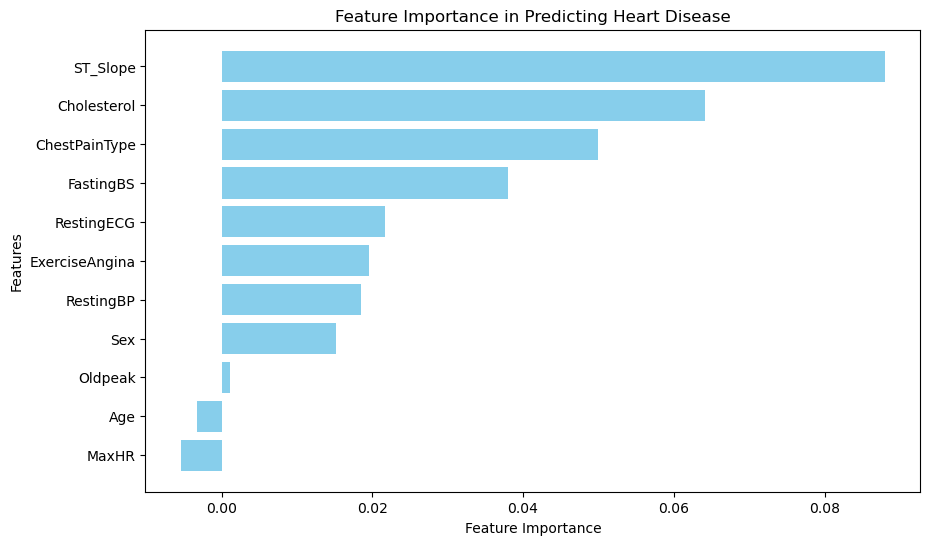

In [50]:
# plot feature importance bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Heart Disease")
plt.gca().invert_yaxis() 
plt.show()